# Let's learn about birds

Import pandas and matplotlib along with the data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('../birds.csv')
birds.head()


,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


Let's visualize these birds' wingspan by showing a very basic line plot

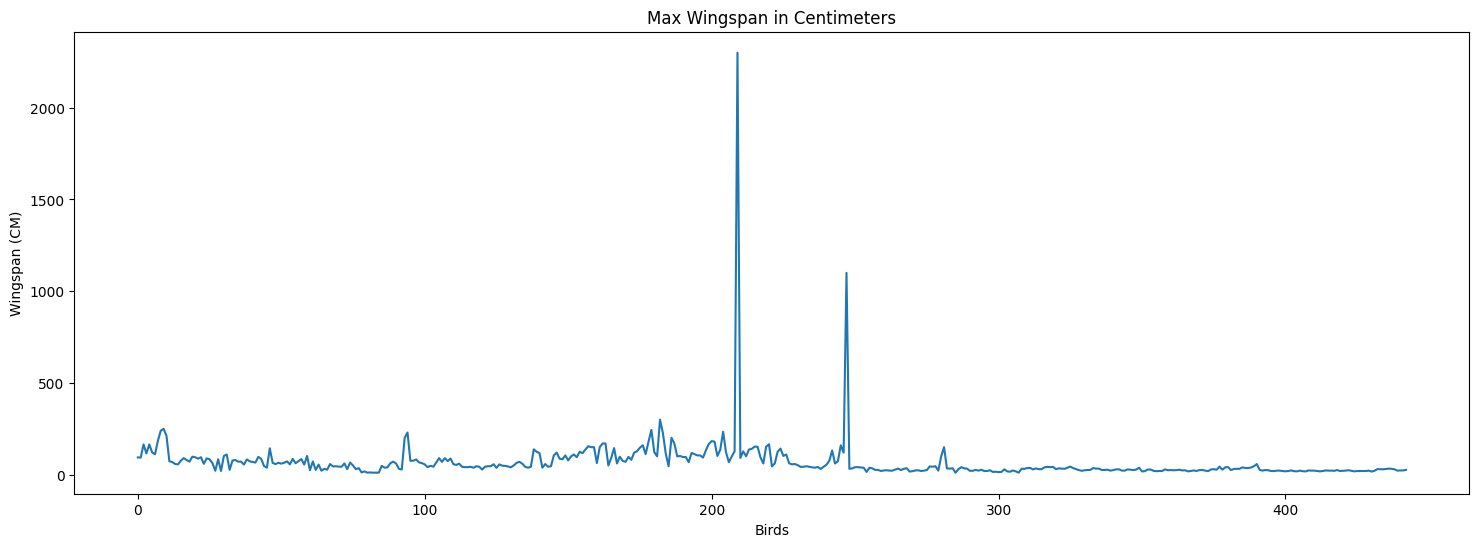

In [2]:
plt.figure(figsize=(18, 6))
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
wingspan = birds.MaxWingspan 
wingspan.plot()
plt.show()

Show the birds' names correlated to their wingspan

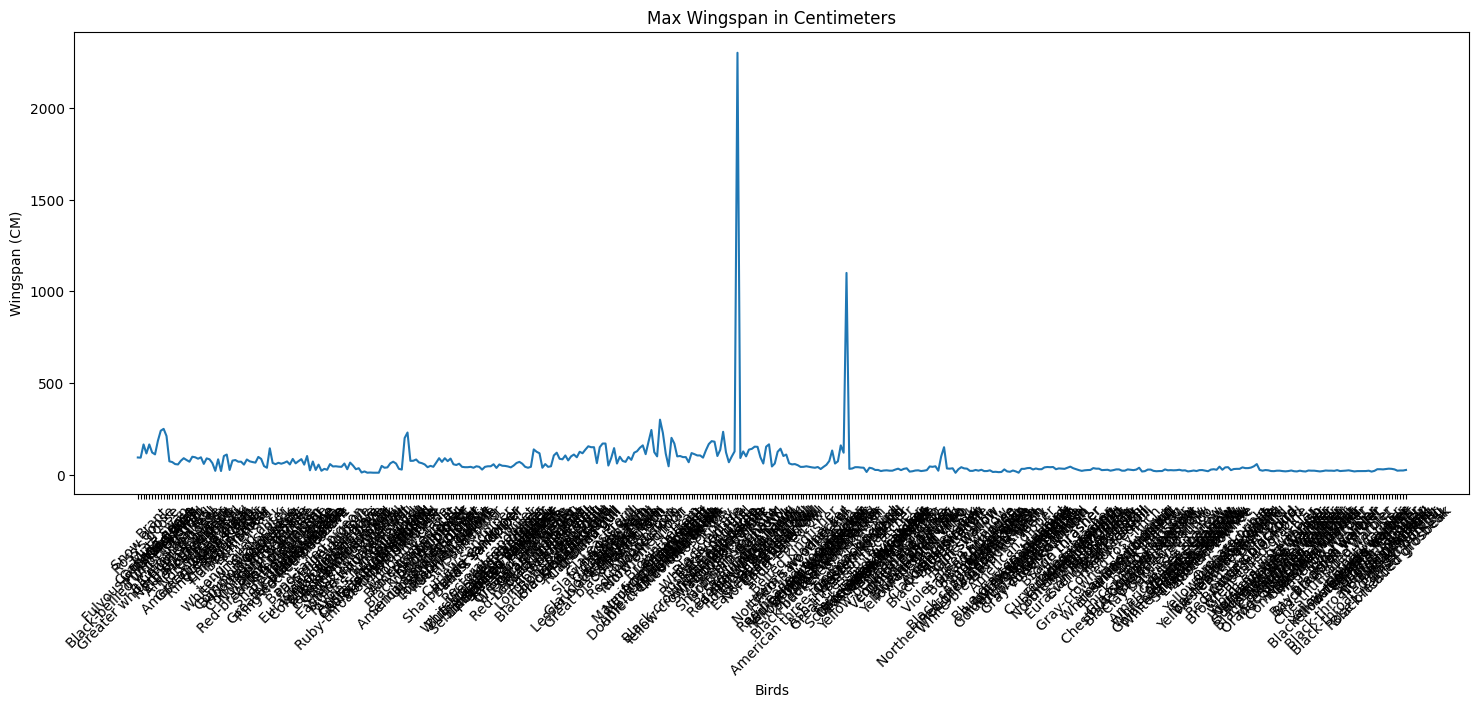

In [3]:
plt.figure(figsize=(18, 6))
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.xticks(rotation=45)
x = birds['Name'] 
y = birds['MaxWingspan']

plt.plot(x, y)

plt.show()

Label the birds whose wingspan is particularly large and are probably outliers

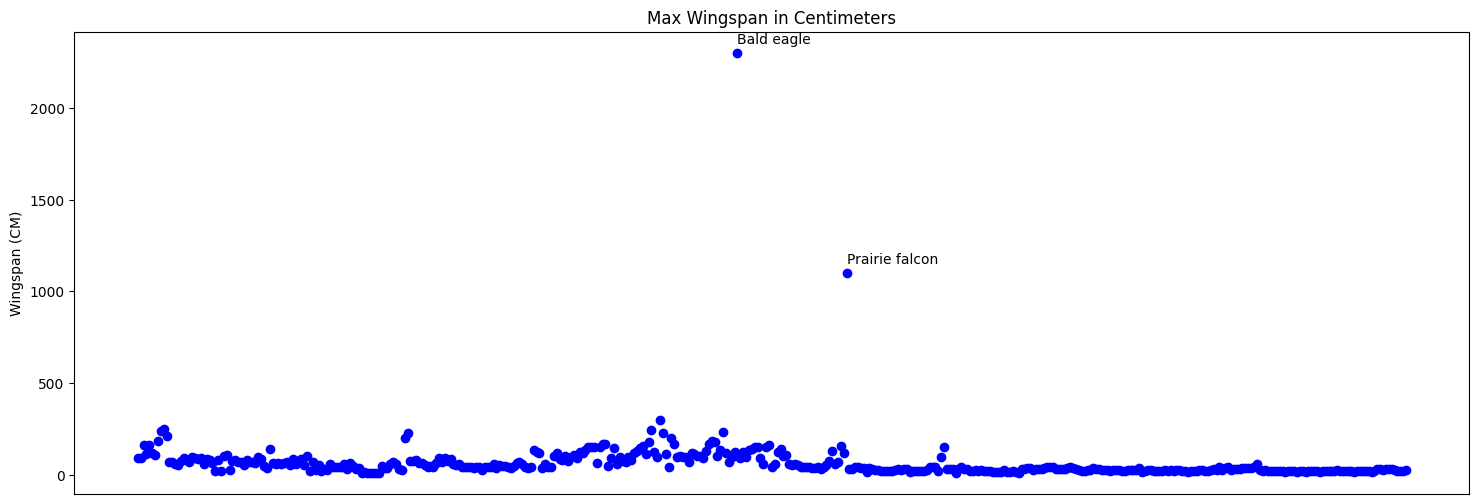

In [4]:
plt.figure(figsize=(18, 6))
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    plt.plot(x, y, 'bo')
    if birds['MaxWingspan'][i] > 500:
        plt.text(x, y + 50, birds['Name'][i], fontsize=10)
    
plt.show()

Remove those outliers and redraw the wingspan

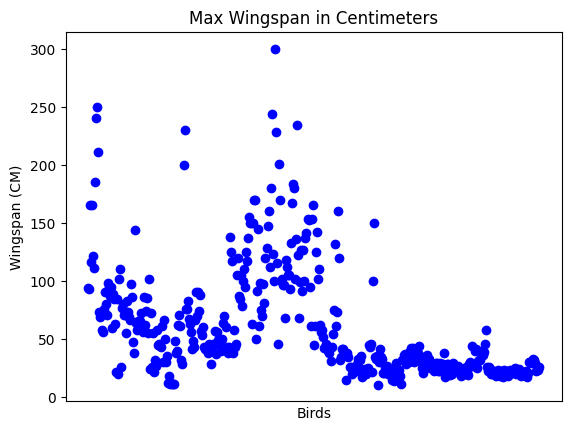

In [9]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    if birds['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, 'bo')
plt.show()
    

### How many categories of birds are there, and what are their numbers? 

In [10]:
category_counts = birds['Category'].value_counts()

conservation_counts = birds['ConservationStatus'].value_counts()

genus_counts = birds['Genus'].value_counts()

order_counts = birds['Order'].value_counts()

print(f'There are have {len(category_counts)} categories of birds')
category_counts.head()

There are have 60 categories of birds


Category
Ducks/Geese/Waterfowl    45
New World warblers       41
Sandpipers/Allies        34
Gulls/Terns/Skimmers     28
New World sparrows       26
Name: count, dtype: int64

### How many birds are extinct, endangered, rare, or common?

In [11]:
print("\nStatus")
conservation_counts


Status


ConservationStatus
LC    402
NT     27
VU     10
EN      2
EX      1
CR      1
Name: count, dtype: int64

### How many are there of the various genus and orders in Linnaeus's terminology?

In [12]:

print("\nGenus count")
print(genus_counts)

print("\nOders count")
print(order_counts)


Genus count
Genus
Setophaga     22
Calidris      15
Larus         10
Vireo          7
Aythya         6
              ..
Mniotilta      1
Oporornis      1
Myioborus      1
Cardinalis     1
Spiza          1
Name: count, Length: 238, dtype: int64

Oders count
Order
Passeriformes        195
Charadriiformes       78
Anseriformes          45
Pelecaniformes        17
Accipitriformes       16
Strigiformes          12
Piciformes            12
Gruiformes            10
Galliformes           10
Apodiformes            9
Columbiformes          8
Falconformes           6
Podicipediformes       6
Gaviiformes            4
Caprimulgiformes       4
Cuculiformes           3
Suliformes             3
Cathartiformes         2
Procellariiformes      1
Ciconiiformes          1
Coraciiformes          1
Name: count, dtype: int64


Working with bar charts, show the categories of birds

<Figure size 2000x1000 with 0 Axes>

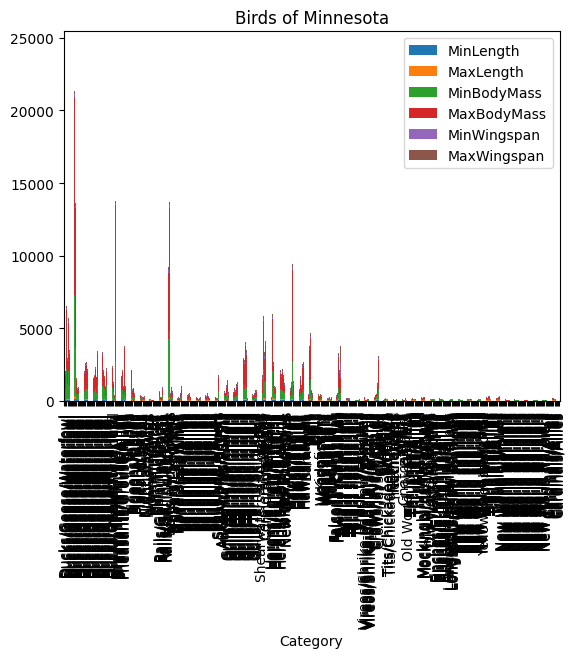

In [13]:
plt.figure(figsize=(20, 10))
birds.plot(x='Category',
        kind='bar',
        stacked=True,
        title='Birds of Minnesota')
plt.show()

Show the count of birds within categories, and show the labels horizontally so we can read the category names

<Axes: >

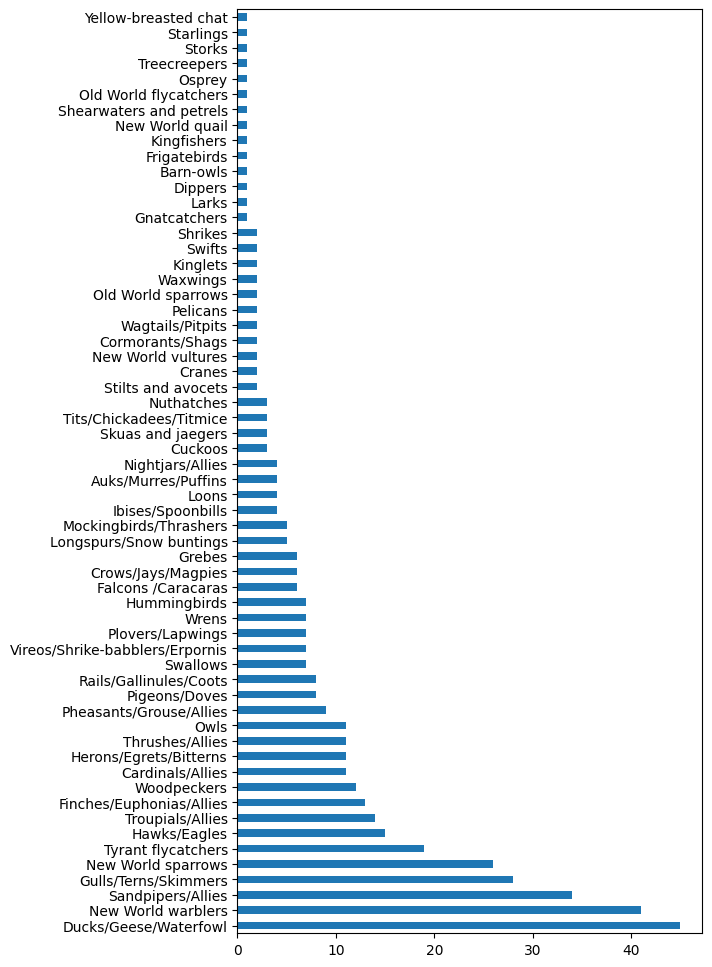

In [53]:
category_count = birds.value_counts(birds['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh() # plot bar herizontal

Show the categories with their maxlength displayed per category

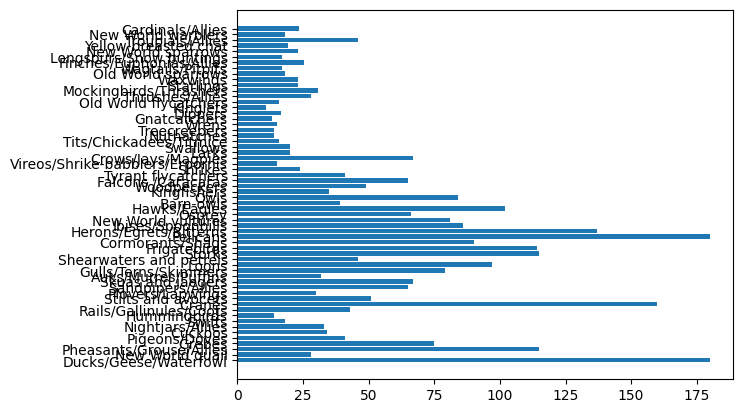

In [14]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()


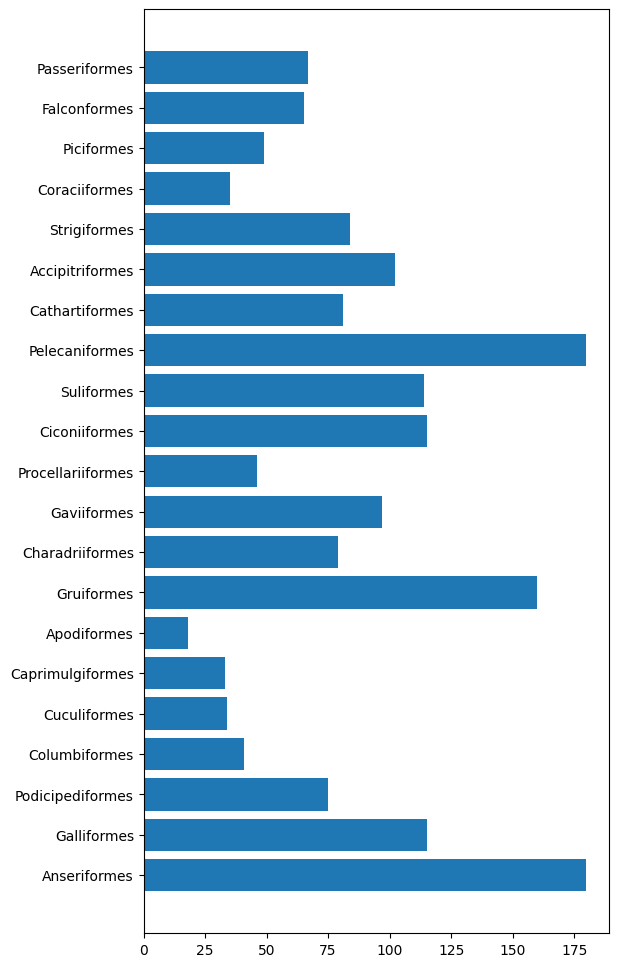

In [15]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Order'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

Superimpose the birds minimum and maximum lengths per category

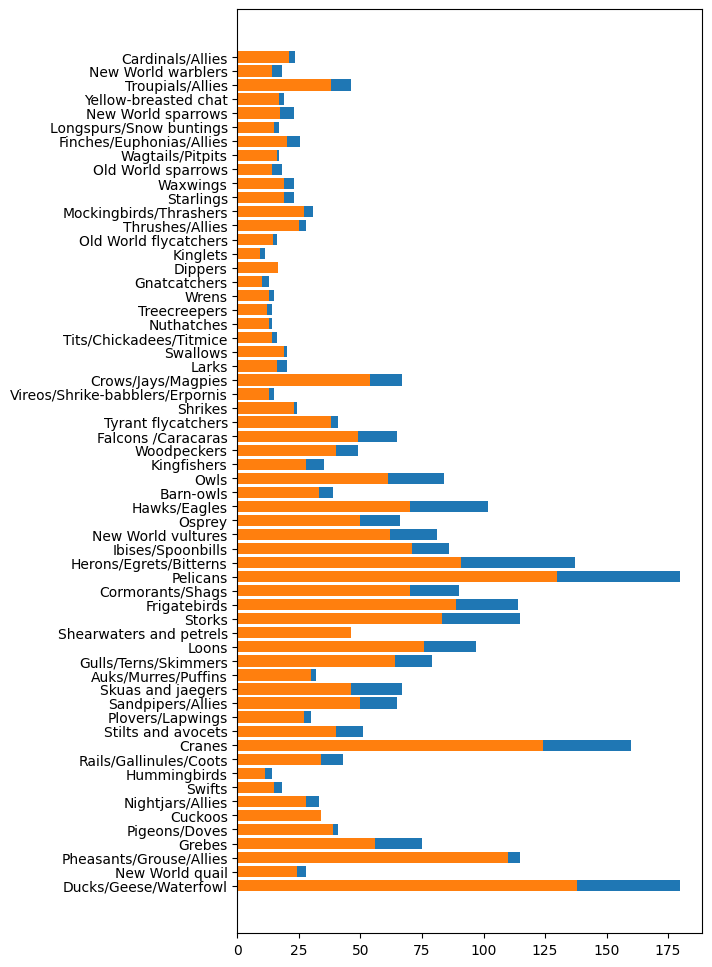

In [ ]:
minLength = birds['MinLength']
maxLength = birds['MaxLength']
category = birds['Category']

plt.barh(category, maxLength)
plt.barh(category, minLength)

plt.show()

Mối tương quan giữa khối lượng cơ thể và chiều dài thân

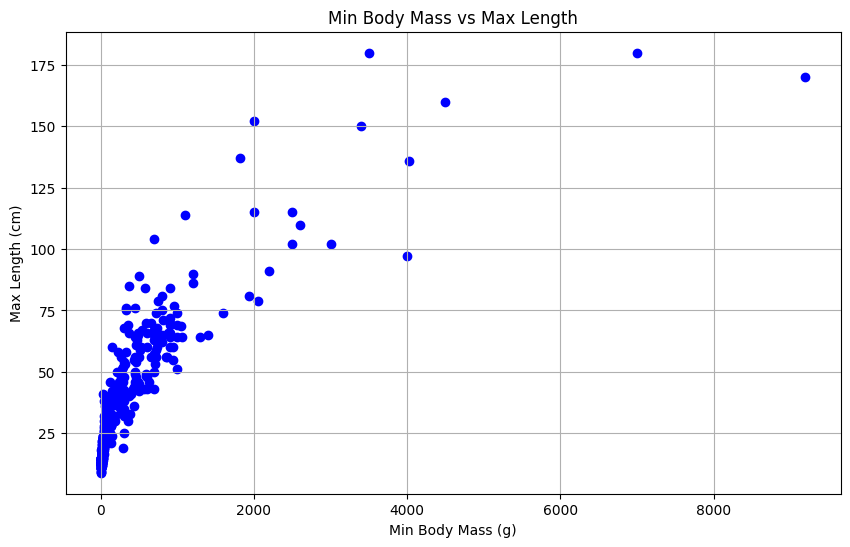

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(birds['MinBodyMass'], birds['MaxLength'], color='blue')
plt.title('Min Body Mass vs Max Length')
plt.xlabel('Min Body Mass (g)')
plt.ylabel('Max Length (cm)')
plt.grid()
plt.show()


Tỷ lệ trạng thái đối với tổng thể

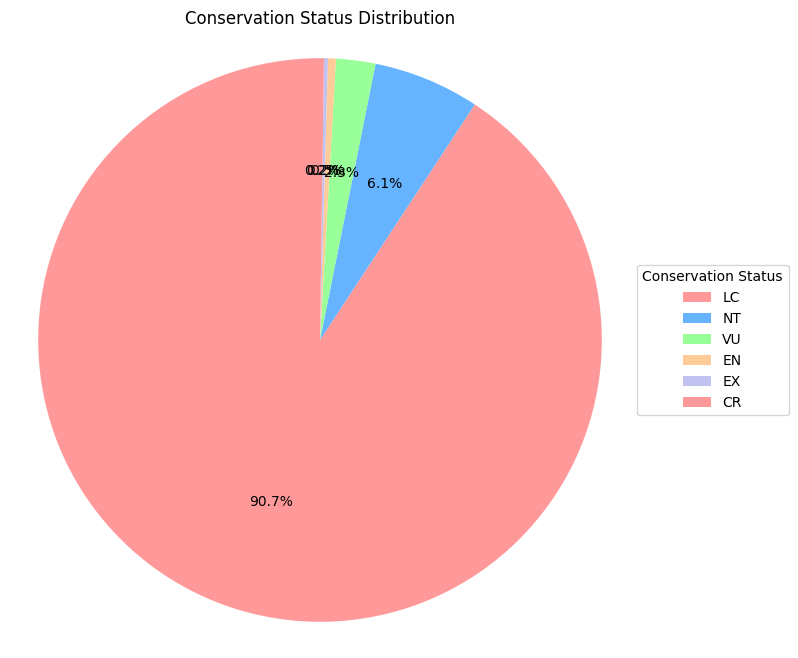

In [96]:
conservation_counts = birds['ConservationStatus'].value_counts()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(conservation_counts, labels=None, 
                                     autopct='%1.1f%%', startangle=90, colors=colors)

plt.legend(wedges, conservation_counts.index, title="Conservation Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Conservation Status Distribution')
plt.axis('equal') 
plt.show()

### Phân tích khối lượng cơ thể các category (lớp)

<Figure size 800x600 with 0 Axes>

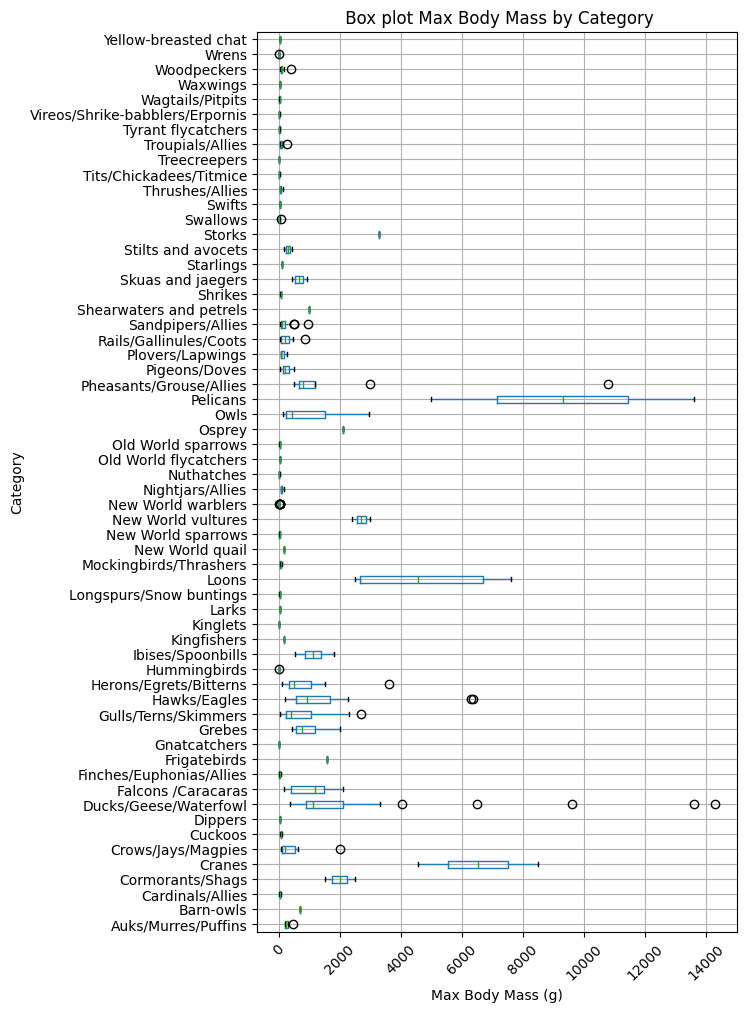

In [153]:
plt.figure(figsize=(8, 6))
birds.boxplot(column='MaxBodyMass', by='Category', vert=False) 
plt.title(' Box plot Max Body Mass by Category')
plt.suptitle('')
plt.ylabel('Category')
plt.xlabel('Max Body Mass (g)')
plt.xticks(rotation=45)  
plt.show()


Có thể nhận ra rằng trung bình khối lượng cơ thể của Pelicans là lớn nhất ngoài ra còn Loons và Cranes 
Nhận ra rằng waterfowl có nhiều ngoại lai (có thể do sai sót trong quá trình nhập) có thể thực hiện loại bỏ

<Axes: >

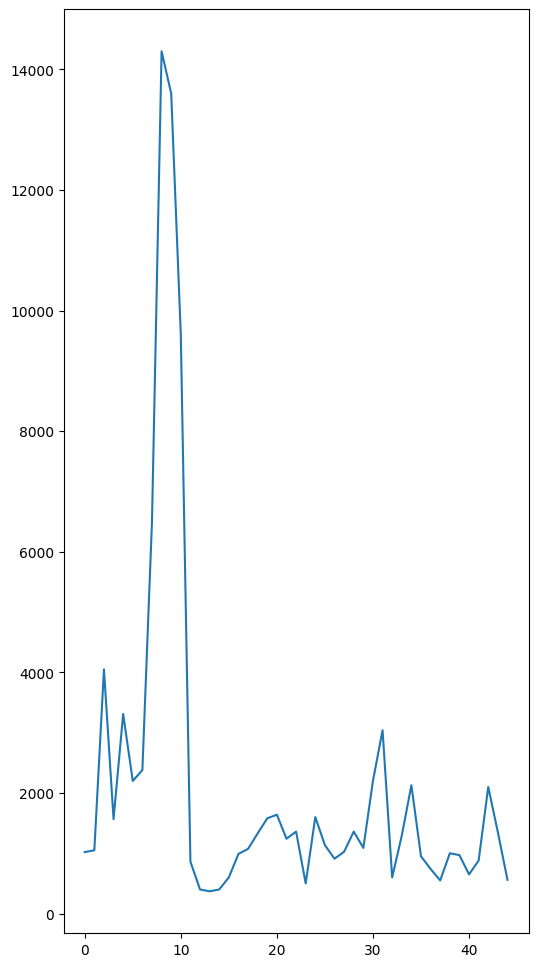

In [16]:
Waterfowl_df = birds[birds['Category']== 'Ducks/Geese/Waterfowl']
Waterfowl_df['MaxBodyMass'].plot()

Nhận thấy rằng khối lương cơ thể của một số loại chim trong loài waterfowl lên đến 14 kg ta cần xem loài nào có cân nặng như vậy

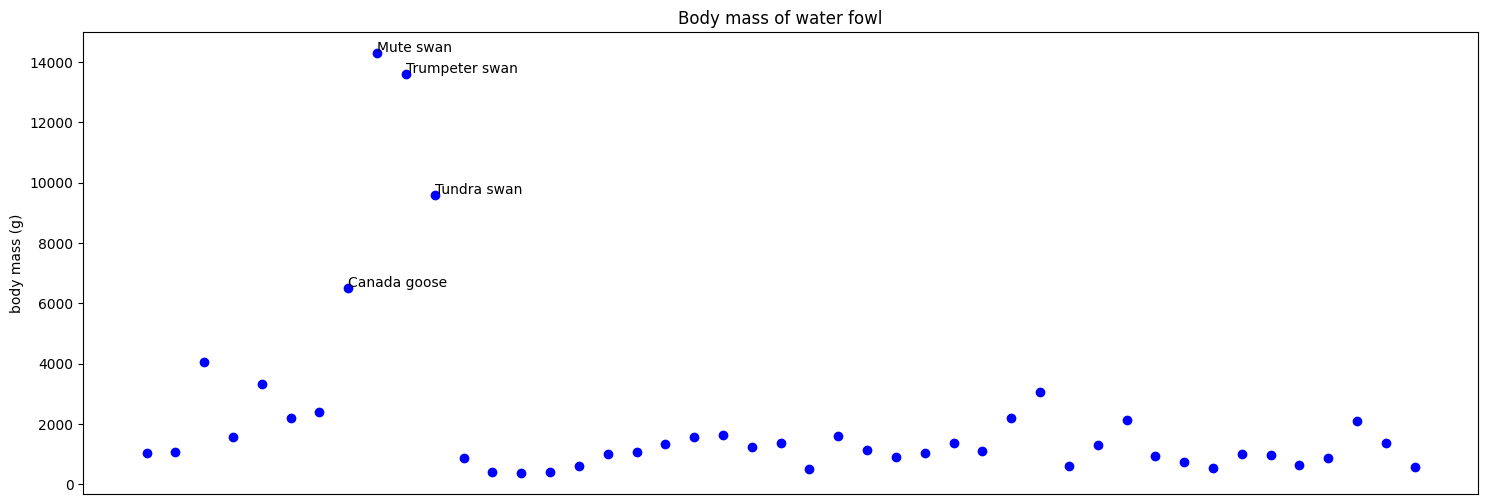

In [17]:
plt.figure(figsize=(18, 6))
plt.title('Body mass of water fowl')
plt.ylabel('body mass (g)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(Waterfowl_df)):
    x = Waterfowl_df['Name'][i]
    y = Waterfowl_df['MaxBodyMass'][i]
    plt.plot(x, y, 'bo')
    if Waterfowl_df['MaxBodyMass'][i] > 6000:
        plt.text(x, y + 50, Waterfowl_df['Name'][i], fontsize=10)
    
plt.show()

Có thể nhận ra rằng một số loại trong  loài chim nước như Mute swan Trumperter swan hoặc Tundra swan có khối lượng cơ thể rất lớn

### Tương tự ta phân tích Chiều dài cơ thể (Max_Length)

<Figure size 800x600 with 0 Axes>

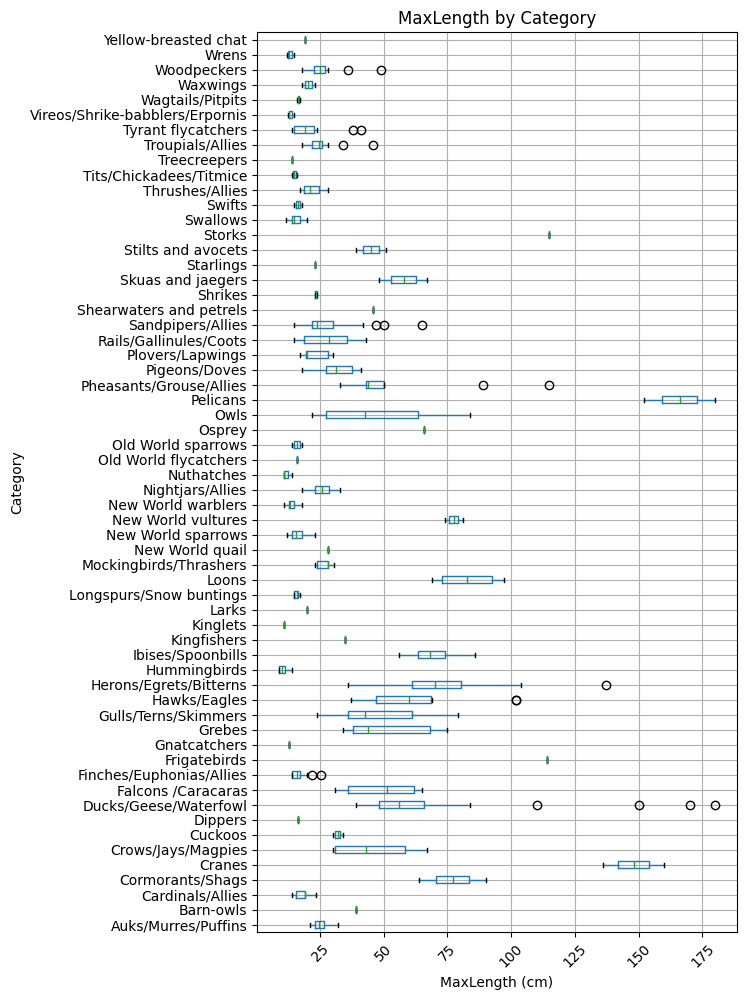

In [18]:
plt.figure(figsize=(8, 6))
birds.boxplot(column='MaxLength', by='Category', vert=False)  # Thay vert=True để hiển thị dọc
plt.title('MaxLength by Category')
plt.suptitle('')
plt.ylabel('Category')
plt.xlabel('MaxLength (cm)')
plt.xticks(rotation=45)  # Xoay nhãn trục x cho dễ đọc
plt.show()


Cũng nhận ra rằng pendicans có chiều dài lớn nhát theo sau đó là Cranes

Và Waterfowl cũng xuất hiện nhiều ngoại lại ta sẽ cùng đi xâu vào phân tích xem những ngoại lai này có phải là những ngoại lại của phần phân tích khối lượng cơ thể không

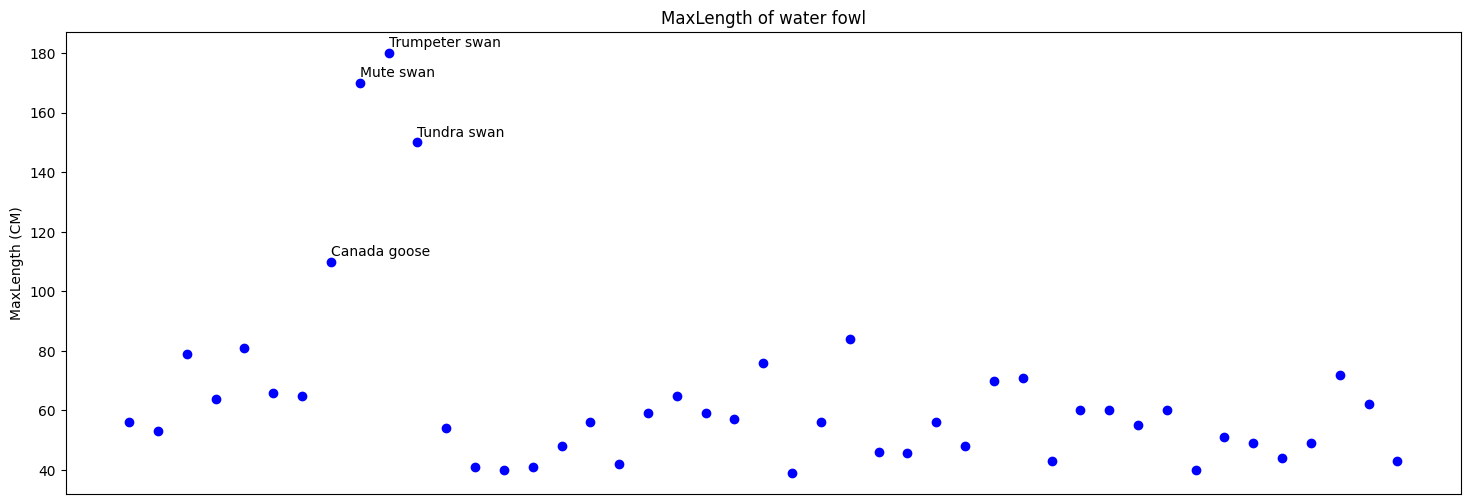

In [19]:
plt.figure(figsize=(18, 6))
plt.title('MaxLength of water fowl')
plt.ylabel('MaxLength (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(Waterfowl_df)):
    x = Waterfowl_df['Name'][i]
    y = Waterfowl_df['MaxLength'][i]
    plt.plot(x, y, 'bo')
    if Waterfowl_df['MaxLength'][i] > 100:
        plt.text(x, y + 2, Waterfowl_df['Name'][i], fontsize=10)
    
plt.show()

Rõ ràng là các loài này vừa có cân nặng lớn và vừa có chiều dài vượt trội

Đễ rõ hơn ta đi tính độ tương quan của chiều thân với khối lượng cơ thể cũng cũng như chiều dài sải cánh

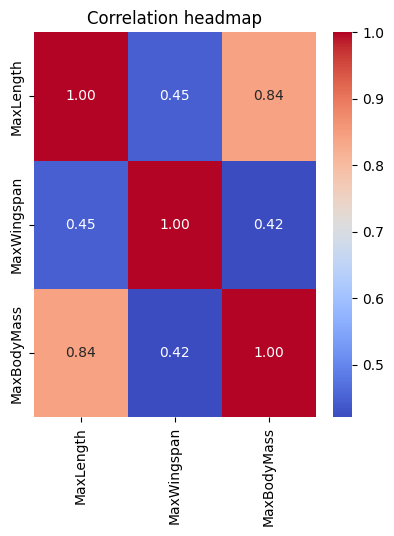

In [43]:
import seaborn as sns
sub_df = birds[['MaxLength','MaxWingspan', 'MaxBodyMass']]
 
correlation_matrix = sub_df.corr()

plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation headmap')

plt.show()

Rõ ràng có sự tương quan lớn giữa khối lượng cơ thể cũng như là chiều dài thân

### Chanlenge
In this lesson, you worked with line charts, scatterplots, and bar charts to show interesting facts about this dataset. In this assignment, dig deeper into the dataset to discover a fact about a given type of bird. For example, create a notebook visualizing all the interesting data you can uncover about Snow Geese. Use the three plots mentioned above to tell a story in your notebook.

In [31]:
geese_df= birds[(birds['Category'].str.contains('Geese'))]
geese_df.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


Hiển thị chiều dài sải cánh của các loại trong geese

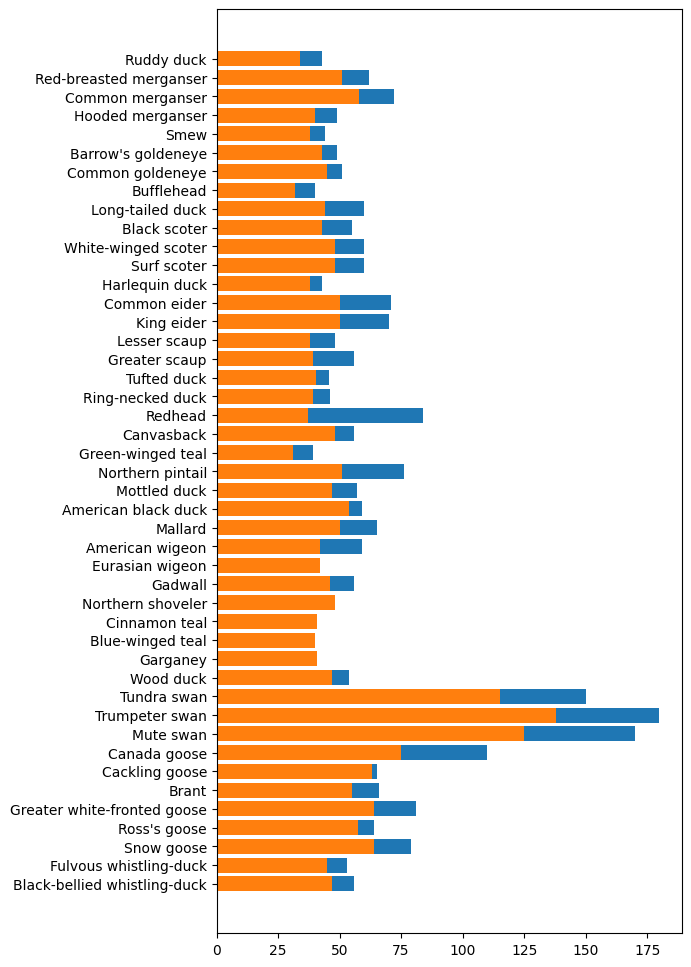

In [33]:
minLength = geese_df['MinLength']
maxLength = geese_df['MaxLength']
name = geese_df['Name']

plt.barh(name, maxLength)
plt.barh(name, minLength)

plt.show()

Có thể nhận ra rằng trong các loài ngỗn thì Tundra swan và Trumpeter swan cùng với Mute swan là có kích thước lớn hơn cả

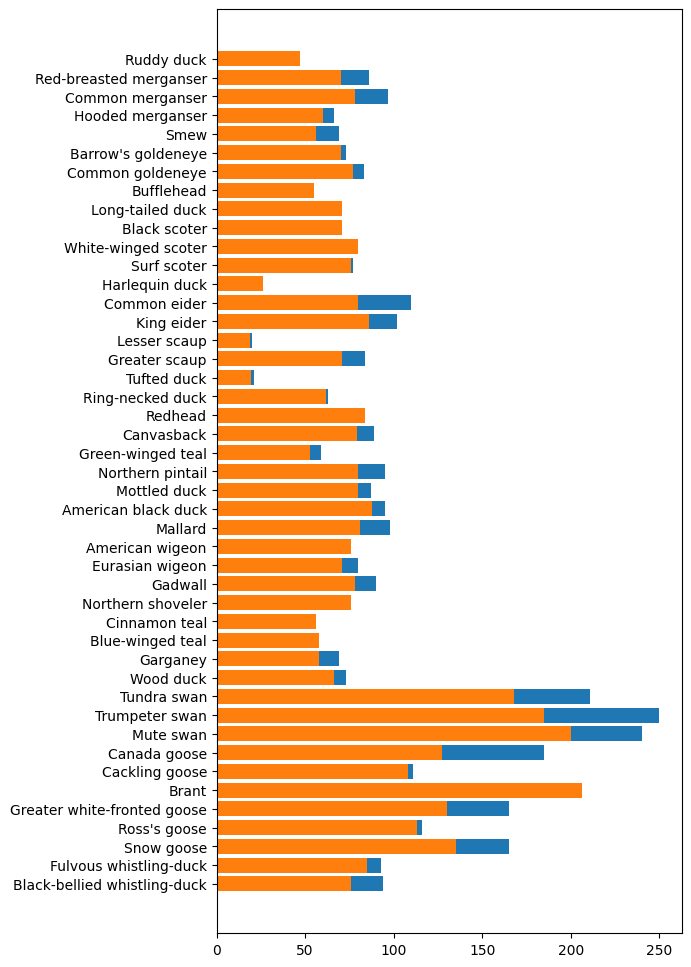

In [34]:
minLength = geese_df['MinWingspan']
maxLength = geese_df['MaxWingspan']
name = geese_df['Name']

plt.barh(name, maxLength)
plt.barh(name, minLength)

plt.show()

Cũng tương tự như chiều dài cơ thể thì kích thước cánh các loài lớn thì cũng có chiều dài cánh lớn